# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning Frameworks</font>

# Keras - Multilayer Perceptron

Historicamente, Perceptron foi o nome dado a um modelo de rede neural com uma única camada linear. Se o modelo tem múltiplas camadas, chamamos de Perceptron Multicamada (MLP). Cada nó na primeira camada recebe uma entrada e dispara de acordo com os limites de decisão locais predefinidos (threesholds). Em seguida, a saída da primeira camada é passada para a segunda camada, cujos resultados são passados para a camada de saída final consistindo de um único neurônio. 

A rede pode ser densa, o que significa que cada neurônio em uma camada está conectado a todos os neurônios localizados na camada anterior e a todos os neurônios na camada seguinte.

### Treinando Redes Neurais com Keras

Vamos considerar um único neurônio. Quais são as melhores escolhas para o peso w e o bias b? Idealmente, gostaríamos de fornecer um conjunto de exemplos de treinamento e deixar o computador ajustar o peso e o bias de tal forma que os erros produzidos na saída sejam minimizados. A fim de tornar isso um pouco mais concreto, vamos supor que temos um conjunto de imagens de gatos e outro conjunto separado de imagens que não contenham gatos. Por uma questão de simplicidade, suponha que cada neurônio olhe para um único valor de pixel de entrada. Enquanto o computador processa essas imagens, gostaríamos que nosso neurônio ajustasse seus pesos e bias para que tenhamos menos e menos imagens erroneamente reconhecidas como não-gatos. Essa abordagem parece muito intuitiva, mas exige que uma pequena alteração nos pesos (e/ou bias) cause apenas uma pequena mudança nas saídas.

Se tivermos um grande salto de saída, não podemos aprender progressivamente. Afinal, as crianças aprendem pouco a pouco. Infelizmente, o perceptron não mostra esse comportamento "pouco a pouco". Um perceptron é 0 ou 1 e isso é um grande salto e não vai ajudá-lo a aprender. Precisamos de algo diferente, mais suave. Precisamos de uma função que mude progressivamente de 0 para 1 sem descontinuidade. Matematicamente, isso significa que precisamos de uma função contínua que nos permita calcular a derivada.

Cada neurônio pode ser inicializado com pesos específicos. Keras oferece algumas opções, a mais comum das quais são listadas da seguinte forma:

Random_uniform: Os pesos são inicializados com valores uniformemente pequenos e aleatórios em (-0,05, 0,05). 

Random_normal: Os pesos são inicializados de acordo com uma distribuição Gaussiana, com média zero e pequeno desvio padrão de 0,05. 

Zero: Todos os pesos são inicializados para zero.

Inicializadores em Keras: https://keras.io/initializers/

### Funções de Ativação

https://keras.io/activations/

### Função Sigmóide

A função sigmóide é uma função matemática de amplo uso em campos como a economia e a computação. O nome "sigmóide" vem da forma em S do seu gráfico.

Um neurônio pode usar o sigmóide para calcular a função não-linear. Um neurônio com ativação sigmóide tem um comportamento semelhante ao perceptron, mas as mudanças são graduais e os valores de saída, como 0.3537 ou 0.147191, são perfeitamente legítimos. 

A função de ativação sigmóide é comumente utilizada por redes neurais com propagação positiva (Feedforward) que precisam ter como saída apenas números positivos, em redes neurais multicamadas e em outras redes com sinais contínuos.

### Função ReLu

O sigmóide não é o único tipo de função de ativação suave usada para redes neurais. Recentemente, uma função muito simples chamada unidade linear rectificada (ReLU) tornou-se muito popular porque gera resultados experimentais muito bons. Uma ReLU é simplesmente definida como uma função não-linear e a função é zero para valores negativos e cresce linearmente para valores positivos.

Sigmoid e ReLU são geralmente chamados funções de ativação das redes neurais. Essas mudanças graduais, típicas das funções Sigmóide e ReLU, são os blocos básicos para o desenvolvimento de um algoritmo de aprendizado que se adapta pouco a pouco, reduzindo progressivamente os erros cometidos pelas redes.

### Reconhecimento de Dígitos

Vamos construir uma rede que pode reconhecer números manuscritos. Para alcançar esse objetivo, usamos o MNIST (http://yann.lecun.com/exdb/mnist), um banco de dados de dígitos manuscritos composto por um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplares. Os exemplos de treinamento são anotados por humanos com a resposta correta. Por exemplo, se o dígito manuscrito for o número três, então três é simplesmente o rótulo associado a esse exemplo. Cada imagem MNIST está na escala de cinza (gray scale), e consiste em 28 x 28 pixels.

### One-Hot Encoding

Em muitas aplicações, é conveniente transformar features categóricas (não-numéricas) em variáveis numéricas. Por exemplo, o dígito de feature categórica com o valor d em [0-9] pode ser codificado em um vetor binário com 10 posições, que sempre tem valor 0, exceto a d-ésima posição onde um 1 está presente. Este tipo de representação é chamado de One-Hot Encoding (OHE) e é muito comum na mineração de dados quando o algoritmo de aprendizagem é especializado para lidar com funções numéricas.

# Multilayer Perceptron - Versão 1

Rede neural com apenas uma camada oculta

In [1]:
import keras
print (keras.__version__)

2.4.3


In [2]:
import tensorflow
print (tensorflow.__version__)

2.4.0


In [4]:
# Import dos Pacotes
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Garantindo que o resultado pode ser reproduzido
np.random.seed(1671)  

# Parâmetros da rede e do treinamento
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # número de outputs = número de dígitos
OPTIMIZER = SGD() # otimizador SGD
N_HIDDEN = 128  # número de neurônios ocultos
VALIDATION_SPLIT = 0.2 # quanto é reservado para validação

# Gerando datasets de treino e e teste
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train possui 60000 linhas de valores 28x28 --> reshape para 60000 x 784
# Gera versão final dos datasetes de treino e de teste
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizando os dados
# Tipicamente, os valores associados a cada pixel são normalizados na faixa [0, 1] 
# (o que significa que a intensidade de cada pixel é dividida por 255, o valor de intensidade máxima). 
# A saída é 10 classes, uma para cada dígito.
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'exemplos de treino')
print(X_test.shape[0], 'exemplos de teste')

# Converte os vetores da class para matrizes binárias das classes
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# Cria as camadas
# A camada final usa a função de ativação softmax, que é uma generalização da função sigmóide. 
# Softmax transforma um vetor k-dimensional de valores reais arbitrários em um vetor k-dimensional de valores reais no 
# intervalo (0, 1). No nosso caso, agrega 10 respostas fornecidas pela camada anterior com 10 neurônios.
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape = (RESHAPED,)))
model.add(Activation('softmax'))

# Sumário
model.summary()

# Compila o modelo
# Precisamos selecionar o otimizador que é o algoritmo específico usado para atualizar pesos enquanto 
# treinamos nosso modelo.
# Precisamos selecionar também a função objetivo que é usada pelo otimizador para navegar no espaço de pesos 
# (frequentemente, as funções objetivo são chamadas de função de perda (loss) e o processo de otimização é definido 
# como um processo de minimização de perdas).
# Outras funções aqui: https://keras.io/losses/
# A função objetivo "categorical_crossentropy" é a função objetivo adequada para predições de rótulos multiclass. 
# É também a escolha padrão em associação com a ativação softmax.
# A métrica é usada para medir a performance do modelo. Outras métricas: https://keras.io/metrics/
# As métricas são semelhantes às funções objetivo, com a única diferença de que elas não são usadas para 
# treinar um modelo, mas apenas para avaliar um modelo. 
model.compile(loss = 'categorical_crossentropy', optimizer = OPTIMIZER, metrics = ['accuracy'])

# Treina o modelo
# Epochs: Este é o número de vezes que o modelo é exposto ao conjunto de treinamento. Em cada iteração, 
# o otimizador tenta ajustar os pesos para que a função objetivo seja minimizada. 
# Batch_size: Esse é o número de instâncias de treinamento observadas antes que o otimizador execute uma 
# atualização de peso.
# Reservamos parte do conjunto de treinamento para validação. A idéia chave é que reservamos uma parte dos 
# dados de treinamento para medir o desempenho na validação durante o treinamento. 
# Esta é uma boa prática para qualquer tarefa de aprendizagem da máquina, que vamos adotar em todos os nossos exemplos.
modelo_v1 = model.fit(X_train, Y_train,
                      batch_size = BATCH_SIZE, 
                      epochs = NB_EPOCH,
                      verbose = VERBOSE, 
                      validation_split = VALIDATION_SPLIT)

# Avalia o modelo com os dados de teste
# Uma vez treinado o modelo, podemos avaliá-lo no conjunto de testes que contém novos exemplos não vistos. 
# Desta forma, podemos obter o valor mínimo alcançado pela função objetivo e o melhor valor alcançado pela métrica 
# de avaliação. Note-se que o conjunto de treinamento e o conjunto de teste são rigorosamente separados. 
# Não vale a pena avaliar um modelo em um exemplo que já foi usado para treinamento. 
# A aprendizagem é essencialmente um processo destinado a generalizar observações invisíveis e não a memorizar 
# o que já é conhecido.
score = model.evaluate(X_test, Y_test, verbose = VERBOSE)

# Imprime a perda e a acurácia
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

60000 exemplos de treino
10000 exemplos de teste
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
375/375 [==============================] - 1s 3ms/step - loss: 1.7668 - accuracy: 0.4854 - val_loss: 0.8982 - val_accuracy: 0.8268
Epoch 2/200
375/375 [==============================] - 1s 2ms/step - loss: 0.8527 - accuracy: 0.8222 - val_loss: 0.6574 - val_accuracy: 0.8584
Epoch 3/200
375/375 [==============================] - 1s 2ms/step - loss: 0.6631 - accuracy: 0.8482 - val_loss: 0.5615 - val_accuracy: 0.8699
Epoch 4/200
375/375 [===============

# Multilayer Perceptron - Versão 2

Adiciona 2 camadas ocultas, usando função de ativação ReLu

In [5]:
# Import dos Pacotes
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from tensorflow import device

# Garantindo que o resultado pode ser reproduzido
np.random.seed(1671)  

# Parâmetros da rede e do treinamento
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # número de outputs = número de dígitos
OPTIMIZER = SGD() # otimizador SGD
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # quanto é reservado para validação

with device('/gpu:0'):

    # Gerando datasets de treino e e teste
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # X_train possui 60000 linhas de valores 28x28 --> reshape para 60000 x 784
    # Gera versão final dos datasetes de treino e de teste
    RESHAPED = 784
    X_train = X_train.reshape(60000, RESHAPED)
    X_test = X_test.reshape(10000, RESHAPED)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # Normalizando os dados
    # Tipicamente, os valores associados a cada pixel são normalizados na faixa [0, 1] 
    # (o que significa que a intensidade de cada pixel é dividida por 255, o valor de intensidade máxima). 
    # A saída é 10 classes, uma para cada dígito.
    X_train /= 255
    X_test /= 255
    print(X_train.shape[0], 'exemplos de treino')
    print(X_test.shape[0], 'exemplos de teste')

    # Converte os vetores da class para matrizes binárias das classes
    Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
    Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

    # Cria as camadas
    model = Sequential()
    model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,)))
    model.add(Activation('relu'))
    model.add(Dense(N_HIDDEN))
    model.add(Activation('relu'))
    model.add(Dense(NB_CLASSES))
    model.add(Activation('softmax'))

    # Sumário
    model.summary()

    # Compila o modelo
    model.compile(loss = 'categorical_crossentropy', optimizer = OPTIMIZER, metrics = ['accuracy'])

    # Treina o modelo
    modelo_v2 = model.fit(X_train, Y_train,
                        batch_size = BATCH_SIZE, 
                        epochs = NB_EPOCH,
                        verbose = VERBOSE, 
                        validation_split = VALIDATION_SPLIT)

    # Avalia o modelo com os dados de teste
    score = model.evaluate(X_test, Y_test, verbose = VERBOSE)

# Imprime a perda e a acurácia
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

60000 exemplos de treino
10000 exemplos de teste
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0

# Multilayer Perceptron - Versão 3

Adicionando Dropout nas camadas ocultas e aumentando o número de epochs

A segunda melhoria é muito simples. Decidimos retirar aleatoriamente, alguns dos valores propagados dentro das camadas  internas densas (camadas ocultas). Na aprendizagem de máquina, esta é uma forma bem conhecida de regularização. Surpreendentemente, esta ideia de descartar aleatoriamente alguns valores pode melhorar nosso desempenho.

Dropout é uma técnica onde os neurônios selecionados aleatoriamente são ignorados durante o treinamento. Eles são "abandonados" aleatoriamente. Isto significa que a sua contribuição para a ativação de neurónios é removida temporariamente na passagem para a frente e quaisquer atualizações de peso não são aplicadas ao neurônio na passagem para trás.

Você pode imaginar que, se os neurônios forem descartados aleatoriamente da rede durante o treinamento, outros neurônios terão de intervir e lidar com a representação necessária para fazer previsões para os neurônios ausentes. Acredita-se que isso resulte em múltiplas representações internas independentes sendo aprendidas pela rede.

O efeito é que a rede se torna menos sensível aos pesos específicos dos neurônios. Isso, por sua vez resulta em uma rede que é capaz de melhorar a generalização e é menos sensível ao overfitting nos dados de treinamento.

O Dropout é facilmente implementado, por seleção aleatória de neurônios a abandonar, com uma dada probabilidade (por exemplo, 20%) a cada ciclo de atualização de peso. Dropout é usado somente durante o treinamento de um modelo e não é usado ao avaliar a habilidade do modelo.

Geralmente, usamos valores de 20% - 50% de neurônios para Dropout, com 20% fornecendo um bom ponto de partida. Uma probabilidade muito baixa tem efeito mínimo e um valor muito alto resulta em sub-aprendizagem pela rede. É provável que você obtenha melhor desempenho quando o Dropout é usado em uma rede maior, dando ao modelo mais de uma oportunidade de aprender representações independentes.

60000 exemplos de treino
10000 exemplos de teste
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense

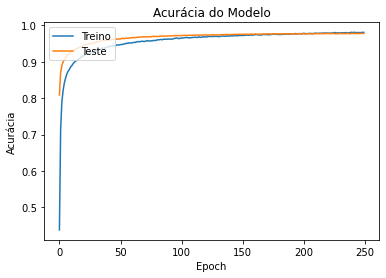

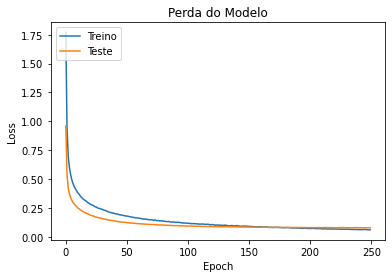

In [6]:
# Import dos pacotes
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from tensorflow import device
import matplotlib.pyplot as plt
%matplotlib inline

# Garantindo que o resultado pode ser reproduzido
np.random.seed(1671)  

# Parâmetros da rede e do treinamento
NB_EPOCH = 250
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # número de outputs = número de dígitos
OPTIMIZER = SGD() # otimizador SGD
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # quanto é reservado para validação
DROPOUT = 0.3


with device('/gpu:0'):
    # Gerando datasets de treino e e teste
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # X_train possui 60000 linhas de valores 28x28 --> reshape para 60000 x 784
    # Gera versão final dos datasetes de treino e de teste
    RESHAPED = 784
    X_train = X_train.reshape(60000, RESHAPED)
    X_test = X_test.reshape(10000, RESHAPED)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # Normalizando os dados
    # Tipicamente, os valores associados a cada pixel são normalizados na faixa [0, 1] 
    # (o que significa que a intensidade de cada pixel é dividida por 255, o valor de intensidade máxima). 
    # A saída é 10 classes, uma para cada dígito.
    X_train /= 255
    X_test /= 255
    print(X_train.shape[0], 'exemplos de treino')
    print(X_test.shape[0], 'exemplos de teste')

    # Converte os vetores da class para matrizes binárias das classes
    Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
    Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

    # Cria as camadas
    model = Sequential()
    model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT))
    model.add(Dense(N_HIDDEN))
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT))
    model.add(Dense(NB_CLASSES))
    model.add(Activation('softmax'))

    # Sumário
    model.summary()

    # Compila o modelo
    model.compile(loss = 'categorical_crossentropy', optimizer = OPTIMIZER, metrics = ['accuracy'])

    # Treina o modelo
    modelo_v3 = model.fit(X_train, Y_train,
                        batch_size = BATCH_SIZE, 
                        epochs = NB_EPOCH,
                        verbose = VERBOSE, 
                        validation_split = VALIDATION_SPLIT)

    # Avalia o modelo com os dados de teste
    score = model.evaluate(X_test, Y_test, verbose = VERBOSE)

# Imprime a perda e a acurácia
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# Imprime os dados
print(modelo_v3.history.keys())

# Sumariza o modelo para acurácia
plt.plot(modelo_v3.history['accuracy'])
plt.plot(modelo_v3.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Teste'], loc = 'upper left')
plt.show()

# Imprime a evolução de erro do modelo
plt.plot(modelo_v3.history['loss'])
plt.plot(modelo_v3.history['val_loss'])
plt.title('Perda do Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Teste'], loc = 'upper left')
plt.show()

In [7]:
modelo_v3.history

{'loss': [1.7709777355194092,
  0.945222020149231,
  0.6986035108566284,
  0.5986617207527161,
  0.5372873544692993,
  0.49170398712158203,
  0.459455281496048,
  0.43376725912094116,
  0.4148152768611908,
  0.3959803581237793,
  0.37988516688346863,
  0.36920687556266785,
  0.35220807790756226,
  0.34061968326568604,
  0.3295201361179352,
  0.32219505310058594,
  0.314069002866745,
  0.3071661591529846,
  0.2978360950946808,
  0.2913559377193451,
  0.28589439392089844,
  0.2783834934234619,
  0.27605172991752625,
  0.26824918389320374,
  0.2608680725097656,
  0.25945931673049927,
  0.25119662284851074,
  0.2479260414838791,
  0.24628804624080658,
  0.24121834337711334,
  0.23868915438652039,
  0.23265628516674042,
  0.23097127676010132,
  0.22603513300418854,
  0.2213960587978363,
  0.2165118157863617,
  0.21375297009944916,
  0.21098479628562927,
  0.2091909945011139,
  0.20490260422229767,
  0.20258371531963348,
  0.19998471438884735,
  0.19765271246433258,
  0.19714953005313873,
  

# Multilayer Perceptron - Versão 4

Testando outros otimizadores

https://keras.io/optimizers

Uma rede neural é essencialmente uma composição de múltiplas funções com milhares, e às vezes milhões, de parâmetros. Cada camada de rede calcula uma função cujo erro deve ser minimizado para melhorar a precisão observada durante a fase de aprendizagem. 

Keras implementa uma variante rápida de descida de gradiente conhecida como descida de gradiente estocástica (SGD) e duas técnicas de otimização mais avançadas conhecidas como RMSprop e Adam. RMSprop e Adam incluem o conceito de momentum (uma componente de velocidade) além da componente de aceleração que tem SGD. Isso permite uma convergência mais rápida ao custo de mais computação. SGD foi nossa escolha padrão até agora. Então vamos tentar os outros dois. É muito simples, só precisamos mudar algumas linhas.

In [8]:
# Import dos pacotes e funções
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop, Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Garantindo que o resultado pode ser reproduzido
np.random.seed(1671)  

In [10]:
# Parâmetros da rede e do treinamento
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # número de outputs = número de dígitos
#OPTIMIZER = RMSprop() # otimizador
OPTIMIZER = Adam() # otimizador
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # quanto é reservado para validação
DROPOUT = 0.3

In [11]:
# Gerando datasets de treino e teste
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [12]:
# X_train possui 60000 linhas de valores 28x28 --> reshape para 60000 x 784
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
# Normalizando os dados
# Tipicamente, os valores associados a cada pixel são normalizados na faixa [0, 1] 
# (o que significa que a intensidade de cada pixel é dividida por 255, o valor de intensidade máxima). 
# A saída é 10 classes, uma para cada dígito.
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'exemplos de treinamento')
print(X_test.shape[0], 'exemplos de teste')

60000 exemplos de treinamento
10000 exemplos de teste


In [14]:
# Converte os vetores da class para matrizes binárias das classes
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [15]:
# Cria as camadas 
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [16]:
# Sumário da rede
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [17]:
# Compila o modelo
model.compile(loss = 'categorical_crossentropy', optimizer = OPTIMIZER, metrics = ['accuracy'])

In [18]:
# Treinamento do modelo
modelo_v4 = model.fit(X_train, Y_train,
                      batch_size = BATCH_SIZE, 
                      epochs = NB_EPOCH,
                      verbose = VERBOSE, 
                      validation_split = VALIDATION_SPLIT)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.8634 - accuracy: 0.7276 - val_loss: 0.1849 - val_accuracy: 0.9467
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2505 - accuracy: 0.9256 - val_loss: 0.1351 - val_accuracy: 0.9609
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1803 - accuracy: 0.9469 - val_loss: 0.1110 - val_accuracy: 0.9662
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1518 - accuracy: 0.9542 - val_loss: 0.1006 - val_accuracy: 0.9694
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1296 - accuracy: 0.9615 - val_loss: 0.0940 - val_accuracy: 0.9728
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1169 - accuracy: 0.9647 - val_loss: 0.0908 - val_accuracy: 0.9719
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1067 - accuracy: 0.9673 - val_loss: 0.0896 - val_accuracy: 0.9739
Epoch 

In [19]:
# Testa o modelo e imprime o score
score = model.evaluate(X_test, Y_test, verbose = VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.9784

Test score: 0.07748832553625107
Test accuracy: 0.9783999919891357


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


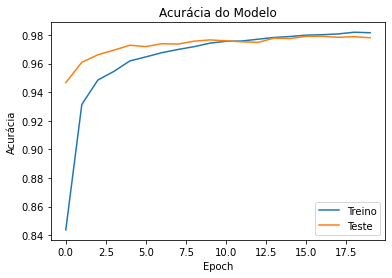

In [20]:
# Imprime os dados no modelo
print(modelo_v4.history.keys())

# Sumariza o modelo para acurácia
plt.plot(modelo_v4.history['accuracy'])
plt.plot(modelo_v4.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Teste'], loc = 'lower right')
plt.show()

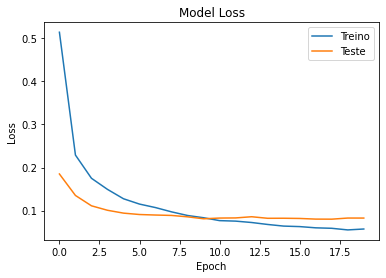

In [21]:
# Imprime a evolução de erro do modelo
plt.plot(modelo_v4.history['loss'])
plt.plot(modelo_v4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Teste'], loc='upper right')
plt.show()

## Fim